In [1]:
import pandas as pd
import os
import scipy.stats as st
import numpy as np
import statsmodels.stats.multitest as smt
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

In [2]:
# load the relative abundance of OTUs, abundant taxa, rare taxa, generalists, specialists

df_OTU_rel = pd.read_csv("../../Input/OTU_rarify_relabun.csv", index_col=0)
df_abun = pd.read_csv("../../Input/abun_relabun.csv", index_col=0)
df_rare = pd.read_csv("../../Input/rare_relabun.csv", index_col=0)
df_gen = pd.read_csv("../../Input/gen_relabun.csv", index_col=0)
df_spe = pd.read_csv("../../Input/spe_relabun.csv", index_col=0)

# load the ecosystem data

ecosystem = pd.read_csv("../../Input/ecosystem.csv", index_col=0)
ecosystem = ecosystem[ecosystem['Ecosystem_recode'] != 'Unknown']

# load the taxonomy data
taxon = pd.read_csv("../../Input/OTU_taxon.csv", index_col=0)

# Plot mean relative abundance vs sites occupied for ecotypes

In [3]:
# prepare input dataframe with mean relative abundance, sites occupied, and ecotypes for scatter plot

abun_OTU = list(df_abun.index)
rare_OTU = list(df_rare.index)
gen_OTU = list(df_gen.index)
spe_OTU = list(df_spe.index)

relabun = df_OTU_rel.mean(axis=1)
relabun = relabun.to_frame(name='meanRelabun')
sites = (df_OTU_rel.iloc[:, 1:] != 0).sum(axis=1).to_frame(name='sitesCount')
relabun_sites = pd.merge(relabun, sites, left_index=True, right_index=True)

lists = {'Abundant taxa': abun_OTU, 'Rare taxa': rare_OTU,'Generalists': gen_OTU,'Specialists': spe_OTU}

relabun_sites['group'] = ''

for label, indices in lists.items():
    relabun_sites.loc[relabun_sites.index.isin(indices), 'group'] = label

relabun_sites = relabun_sites[relabun_sites['group'].astype(bool)]

# sort dataframe by strings in the group column
custom_order = ["Abundant taxa", "Rare taxa", "Generalists", "Specialists"]
relabun_sites['group'] = pd.Categorical(relabun_sites['group'], categories=custom_order, ordered=True)
relabun_sites_sorted = relabun_sites.sort_values(by='group')

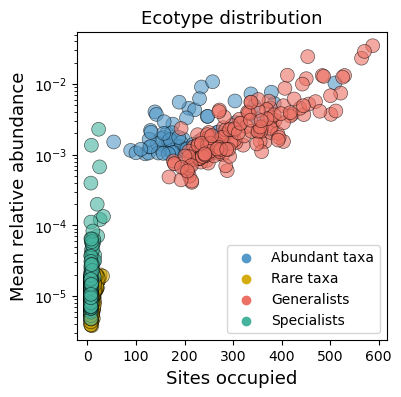

In [7]:
# make a scatter plot

group_colors = {
    'Abundant taxa': '#5499C7',
    'Rare taxa': '#D4AC0D',
    'Generalists': '#EC7063',
    'Specialists': '#45B39D'
}

ax = sns.scatterplot(data=relabun_sites_sorted, x='sitesCount', y='meanRelabun', hue='group',
                     palette=group_colors, s=100, linewidth=0.5, edgecolor='black', alpha=0.6)

plt.rcParams["figure.figsize"] = (4, 4)
plt.yscale('log')
ax.set_xlabel('Sites occupied', size=13)
ax.set_ylabel('Mean relative abundance', size=13)
ax.set_title('Ecotype distribution', size=13)
ax.legend()
plt.savefig('../output/ecotype_distribution.pdf', bbox_inches='tight', dpi=600)
plt.show()

# Distribution across ecosystems

In [3]:
# prepare a dataframe including columns for relative abundance, ecotype, and ecosystems
df_abun_T = df_abun.T
df_abun_ct = df_abun_T.apply(lambda row: np.count_nonzero(row), axis=1).to_frame(name='Count')
df_abun_ct['group'] = 'Abundant taxa'
df_abun_eco = pd.merge(df_abun_ct, ecosystem, left_index = True, right_index = True)

df_rare_T = df_rare.T
df_rare_ct = df_rare_T.apply(lambda row: np.count_nonzero(row), axis=1).to_frame(name='Count')
df_rare_ct['group'] = 'Rare taxa'
df_rare_eco = pd.merge(df_rare_ct, ecosystem, left_index = True, right_index = True)

df_gen_T = df_gen.T
df_gen_ct = df_gen_T.apply(lambda row: np.count_nonzero(row), axis=1).to_frame(name='Count')
df_gen_ct['group'] = 'Generalists'
df_gen_eco = pd.merge(df_gen_ct, ecosystem, left_index = True, right_index = True)

df_spe_T = df_spe.T
df_spe_ct = df_spe_T.apply(lambda row: np.count_nonzero(row), axis=1).to_frame(name='Count')
df_spe_ct['group'] = 'Specialists'
df_spe_eco = pd.merge(df_spe_ct, ecosystem, left_index = True, right_index = True)

In [4]:
df_group_eco = pd.concat([df_abun_eco, df_rare_eco, df_gen_eco, df_spe_eco])

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Generalists_Shrubland vs. Generalists_Herbaceous: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.146e-11 U_stat=9.350e+02
Specialists_Shrubland vs. Specialists_Herbaceous: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.142e-04 U_stat=3.934e+03
Abundant taxa_Shrubland vs. Abundant taxa_Herbaceous: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.415e-09 U_stat=1.152e+03
Generalists_Shrubland vs. Generalists_Steppe/Savanna: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.758e-05 U_stat=2.825e+02
Specialists_Wetland vs. Specialists_Herbaceous: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.591e-04 U_stat=4.992e+03
Specialists_Shrubland vs. Special

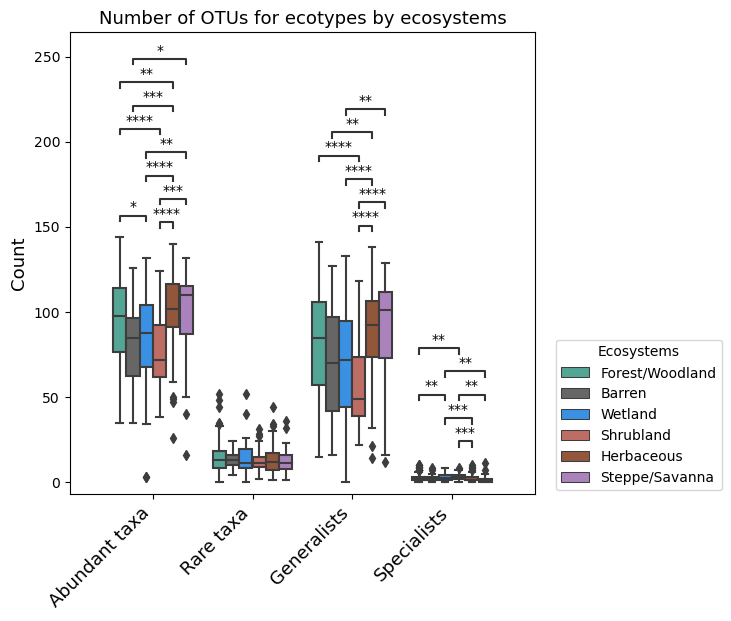

In [5]:
x = "group"
y = "Count"
hue = "Ecosystem_recode"
hue_order=['Forest/Woodland', 'Barren', 'Wetland', 'Shrubland', 'Herbaceous', 'Steppe/Savanna']
order = ["Abundant taxa", "Rare taxa", "Generalists", "Specialists"]

group_colors = {
    'Forest/Woodland': '#45B39D',
    'Barren': '#666666',
    'Wetland': '#1E90FF',
    'Shrubland': '#CD6155',
    'Herbaceous': '#A0522D',
    'Steppe/Savanna': '#AF7AC5'
}

# include all comparisons first and comment the ones that are not significant after FDR correction
pairs=[
    # (("Abundant taxa", "Forest/Woodland"), ("Abundant taxa", "Barren")),
    (("Abundant taxa", "Forest/Woodland"), ("Abundant taxa", "Wetland")),
    (("Abundant taxa", "Forest/Woodland"), ("Abundant taxa", "Shrubland")),
    (("Abundant taxa", "Forest/Woodland"), ("Abundant taxa", "Herbaceous")),
    # (("Abundant taxa", "Forest/Woodland"), ("Abundant taxa", "Steppe/Savanna")),
    # (("Abundant taxa", "Barren"), ("Abundant taxa", "Wetland")),
    # (("Abundant taxa", "Barren"), ("Abundant taxa", "Shrubland")),
    (("Abundant taxa", "Barren"), ("Abundant taxa", "Herbaceous")),
    (("Abundant taxa", "Barren"), ("Abundant taxa", "Steppe/Savanna")),
    # (("Abundant taxa", "Wetland"), ("Abundant taxa", "Shrubland")),
    (("Abundant taxa", "Wetland"), ("Abundant taxa", "Herbaceous")),
    (("Abundant taxa", "Wetland"), ("Abundant taxa", "Steppe/Savanna")),
    (("Abundant taxa", "Shrubland"), ("Abundant taxa", "Herbaceous")),
    (("Abundant taxa", "Shrubland"), ("Abundant taxa", "Steppe/Savanna")),
    # (("Abundant taxa", "Herbaceous"), ("Abundant taxa", "Steppe/Savanna")),
    # (("Rare taxa", "Forest/Woodland"), ("Rare taxa", "Barren")),
    # (("Rare taxa", "Forest/Woodland"), ("Rare taxa", "Wetland")),
    # (("Rare taxa", "Forest/Woodland"), ("Rare taxa", "Shrubland")),
    # (("Rare taxa", "Forest/Woodland"), ("Rare taxa", "Herbaceous")),
    # (("Rare taxa", "Forest/Woodland"), ("Rare taxa", "Steppe/Savanna")),
    # (("Rare taxa", "Barren"), ("Rare taxa", "Wetland")),
    # (("Rare taxa", "Barren"), ("Rare taxa", "Shrubland")),
    # (("Rare taxa", "Barren"), ("Rare taxa", "Herbaceous")),
    # (("Rare taxa", "Barren"), ("Rare taxa", "Steppe/Savanna")),
    # (("Rare taxa", "Wetland"), ("Rare taxa", "Shrubland")),
    # (("Rare taxa", "Wetland"), ("Rare taxa", "Herbaceous")),
    # (("Rare taxa", "Wetland"), ("Rare taxa", "Steppe/Savanna")),
    # (("Rare taxa", "Shrubland"), ("Rare taxa", "Herbaceous")),
    # (("Rare taxa", "Shrubland"), ("Rare taxa", "Steppe/Savanna")),
    # (("Rare taxa", "Herbaceous"), ("Rare taxa", "Steppe/Savanna")),
    # (("Generalists", "Forest/Woodland"), ("Generalists", "Barren")),
    # (("Generalists", "Forest/Woodland"), ("Generalists", "Wetland")),
    (("Generalists", "Forest/Woodland"), ("Generalists", "Shrubland")),
    # (("Generalists", "Forest/Woodland"), ("Generalists", "Herbaceous")),
    # (("Generalists", "Forest/Woodland"), ("Generalists", "Steppe/Savanna")),
    # (("Generalists", "Barren"), ("Generalists", "Wetland")),
    # (("Generalists", "Barren"), ("Generalists", "Shrubland")),
    (("Generalists", "Barren"), ("Generalists", "Herbaceous")),
    # (("Generalists", "Barren"), ("Generalists", "Steppe/Savanna")),
    # (("Generalists", "Wetland"), ("Generalists", "Shrubland")),
    (("Generalists", "Wetland"), ("Generalists", "Herbaceous")),
    (("Generalists", "Wetland"), ("Generalists", "Steppe/Savanna")),
    (("Generalists", "Shrubland"), ("Generalists", "Herbaceous")),
    (("Generalists", "Shrubland"), ("Generalists", "Steppe/Savanna")),
    # (("Generalists", "Herbaceous"), ("Generalists", "Steppe/Savanna")),
    # (("Specialists", "Forest/Woodland"), ("Specialists", "Barren")),
    (("Specialists", "Forest/Woodland"), ("Specialists", "Wetland")),
    (("Specialists", "Forest/Woodland"), ("Specialists", "Shrubland")),
    # (("Specialists", "Forest/Woodland"), ("Specialists", "Herbaceous")),
    # (("Specialists", "Forest/Woodland"), ("Specialists", "Steppe/Savanna")),
    # (("Specialists", "Barren"), ("Specialists", "Wetland")),
    # (("Specialists", "Barren"), ("Specialists", "Shrubland")),
    # (("Specialists", "Barren"), ("Specialists", "Herbaceous")),
    # (("Specialists", "Barren"), ("Specialists", "Steppe/Savanna")),
    # (("Specialists", "Wetland"), ("Specialists", "Shrubland")),
    (("Specialists", "Wetland"), ("Specialists", "Herbaceous")),
    (("Specialists", "Wetland"), ("Specialists", "Steppe/Savanna")),
    (("Specialists", "Shrubland"), ("Specialists", "Herbaceous")),
    (("Specialists", "Shrubland"), ("Specialists", "Steppe/Savanna")),
    # (("Specialists", "Herbaceous"), ("Specialists", "Steppe/Savanna")),
    ]

plt.rcParams["figure.figsize"] = (6, 6)

ax = sns.boxplot(data=df_group_eco, x=x, y=y, order=order, hue=hue, hue_order=hue_order, palette=group_colors)
annot = Annotator(ax, pairs, data=df_group_eco, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Mann-Whitney', comparisons_correction="Benjamini-Hochberg", verbose=2)
annot.apply_test()
annot.annotate()
ax.set_xlabel('')
ax.set_ylabel('Count', size=13)
ax.set_title('Number of OTUs for ecotypes by ecosystems', size=13)
plt.xticks(fontsize=13, rotation=45, ha='right')
plt.legend(title="Ecosystems", bbox_to_anchor=(1.03, 0.35))
plt.savefig('../output/ecotype_ecosystems.pdf', bbox_inches='tight', dpi=600)
plt.show()

# Proportion of phyla that ecotypes representing

In [35]:
# calculate the observed proportion for each phylum within each ecotype

taxon_abun = taxon[taxon.index.isin(df_abun.index)]
prop_abun = taxon_abun['Phylum'].value_counts(normalize=True).to_frame(name='Proportion')

taxon_rare = taxon[taxon.index.isin(df_rare.index)]
prop_rare = taxon_rare['Phylum'].value_counts(normalize=True).to_frame(name='Proportion')

taxon_gen = taxon[taxon.index.isin(df_gen.index)]
prop_gen = taxon_gen['Phylum'].value_counts(normalize=True).to_frame(name='Proportion')

taxon_spe = taxon[taxon.index.isin(df_spe.index)]
prop_spe = taxon_spe['Phylum'].value_counts(normalize=True).to_frame(name='Proportion')


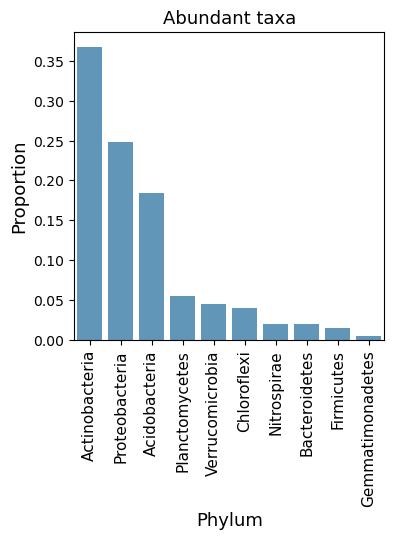

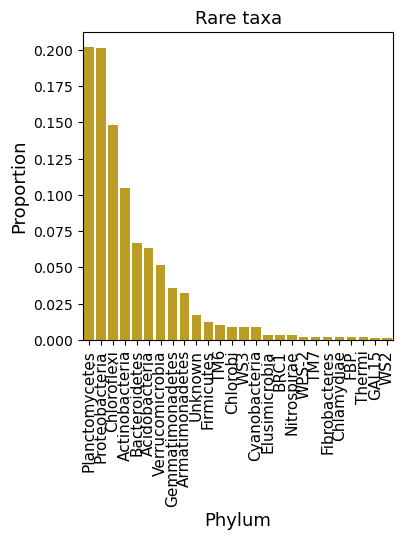

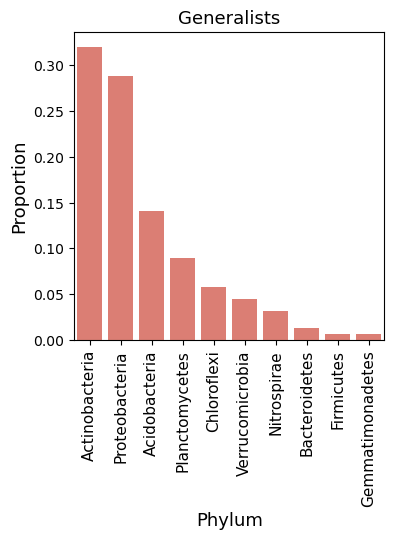

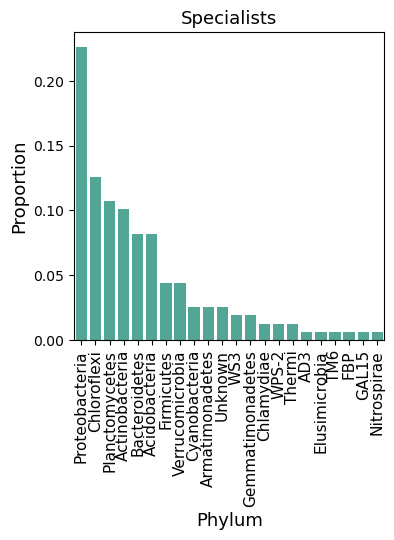

In [37]:
# Make a barplot showing the proportion of phyla for each ecotype

plt.rcParams["figure.figsize"] = (4, 4)

def barplot_prop(df, groupname, color):
    ax = sns.barplot(x = df.index, y = df['Proportion'], color = color)
    ax.set_xlabel('Phylum', size=13)
    ax.set_ylabel('Proportion', size=13)
    ax.set_title(groupname, size=13)
    plt.xticks(fontsize=11, rotation = 90)

    plt.savefig('../output/' + groupname + '_phylum_bar.pdf', bbox_inches='tight', dpi=600)
    plt.show()

barplot_prop(prop_abun, 'Abundant taxa', '#5499C7')
barplot_prop(prop_rare, 'Rare taxa', '#D4AC0D')
barplot_prop(prop_gen, 'Generalists', '#EC7063')
barplot_prop(prop_spe, 'Specialists', '#45B39D')


# Enrichment analysis for ecotypes at the phylum level
Identify phyla significantly enriched within each ecotype

In [27]:
# calculate the expected proportion for each phylum
prop_exp = taxon['Phylum'].value_counts(normalize=True).to_frame(name='Proportion')

In [28]:
# calculate the observed count for each phylum within each ecotype

count_abun = taxon_abun['Phylum'].value_counts(normalize=False).to_frame(name='Count')
count_rare = taxon_rare['Phylum'].value_counts(normalize=False).to_frame(name='Count')
count_gen = taxon_gen['Phylum'].value_counts(normalize=False).to_frame(name='Count')
count_spe = taxon_spe['Phylum'].value_counts(normalize=False).to_frame(name='Count')

In [29]:
# a function to perform enrichment analysis based on binomial distribution

def enrichment_analysis(obs_ct_df, exp_prop_df):
    i_dict = {}
    for index, row in obs_ct_df.iterrows():
        n = row['Count']
        p = exp_prop_df._get_value(index, 'Proportion')
        N = obs_ct_df['Count'].sum()
        i = (n - p * N)/np.sqrt(p * (1 - p) * N)
        i_dict[index] = i

    i_df = pd.DataFrame.from_dict(i_dict, orient='index',columns=['Enrichment index'])

    return i_df

In [30]:
abun_enrich = enrichment_analysis(count_abun, prop_exp)
rare_enrich = enrichment_analysis(count_rare, prop_exp)
gen_enrich = enrichment_analysis(count_gen, prop_exp)
spe_enrich = enrichment_analysis(count_spe, prop_exp)

In [31]:
# prepare a dataframe with columns of phylum, enrichment index, count of OTUs, and group for all ecotypes combined
abun_enrich_count = pd.merge(abun_enrich, count_abun, left_index = True, right_index = True)
abun_enrich_count = abun_enrich_count.reset_index(names=['Phylum']).sort_values(by="Enrichment index", ascending=False)
abun_enrich_count['Ecotype'] = 'Abundant taxa'

rare_enrich_count = pd.merge(rare_enrich, count_rare, left_index = True, right_index = True)
rare_enrich_count = rare_enrich_count.reset_index(names=['Phylum']).sort_values(by="Enrichment index", ascending=False)
rare_enrich_count['Ecotype'] = 'Rare taxa'

gen_enrich_count = pd.merge(gen_enrich, count_gen, left_index = True, right_index = True)
gen_enrich_count = gen_enrich_count.reset_index(names=['Phylum']).sort_values(by="Enrichment index", ascending=False)
gen_enrich_count['Ecotype'] = 'Generalists'

spe_enrich_count = pd.merge(spe_enrich, count_spe, left_index = True, right_index = True)
spe_enrich_count = spe_enrich_count.reset_index(names=['Phylum']).sort_values(by="Enrichment index", ascending=False)
spe_enrich_count['Ecotype'] = 'Specialists'

all_enrich_count = pd.concat([abun_enrich_count, rare_enrich_count, gen_enrich_count, spe_enrich_count])

In [32]:
all_enrich_count

,Phylum,Enrichment index,Count,Ecotype
0,Actinobacteria,7.779135,74,Abundant taxa
2,Acidobacteria,3.382341,37,Abundant taxa
6,Nitrospirae,2.674351,4,Abundant taxa
1,Proteobacteria,0.515530,50,Abundant taxa
4,Verrucomicrobia,0.164878,9,Abundant taxa
...,...,...,...,...
0,Proteobacteria,-0.207500,36,Specialists
12,Gemmatimonadetes,-0.427680,3,Specialists
5,Acidobacteria,-1.122383,13,Specialists
3,Actinobacteria,-2.177060,16,Specialists


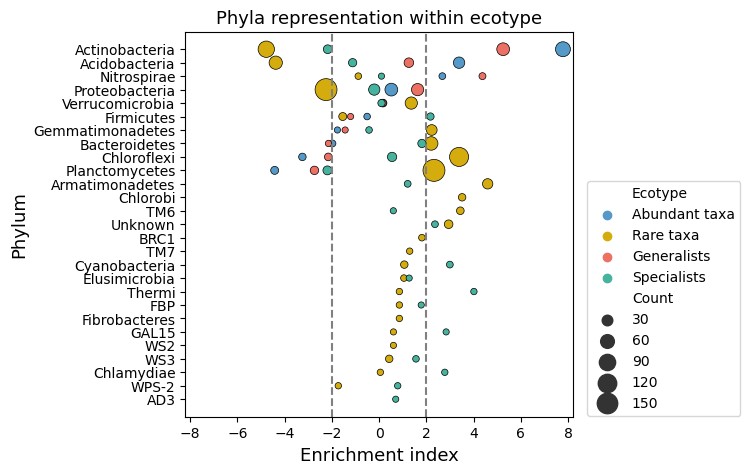

In [34]:
# make a bubble plot

group_colors = {
    'Abundant taxa': '#5499C7',
    'Rare taxa': '#D4AC0D',
    'Generalists': '#EC7063',
    'Specialists': '#45B39D'
}

plt.rcParams["figure.figsize"] = (5, 5)

# Use a scatter plot with varying sizes and colors
bubble_plot = sns.scatterplot(
    data=all_enrich_count,
    x='Enrichment index',
    y='Phylum',
    size='Count',
    hue='Ecotype',
    palette=group_colors,
    sizes=(20, 250),  # Adjust the range of bubble sizes
    alpha=1,
    edgecolor='black',
    linewidth=0.5
)

plt.axvline(x=-2, color='grey', linestyle='--')
plt.axvline(x=2, color='grey', linestyle='--')
plt.title('Phyla representation within ecotype', size = 13)
plt.xlabel('Enrichment index', size = 13)
plt.ylabel('Phylum', size = 13)
plt.legend(bbox_to_anchor=(1.45, 0.63))
plt.xlim(-8.2,8.2)

plt.savefig('../output/ecotype_phyla_enrich.pdf', bbox_inches='tight', dpi=600)
plt.show()